##Name: Pralhad Gurung
##Uni_ID: 2330714
##Group: 7

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


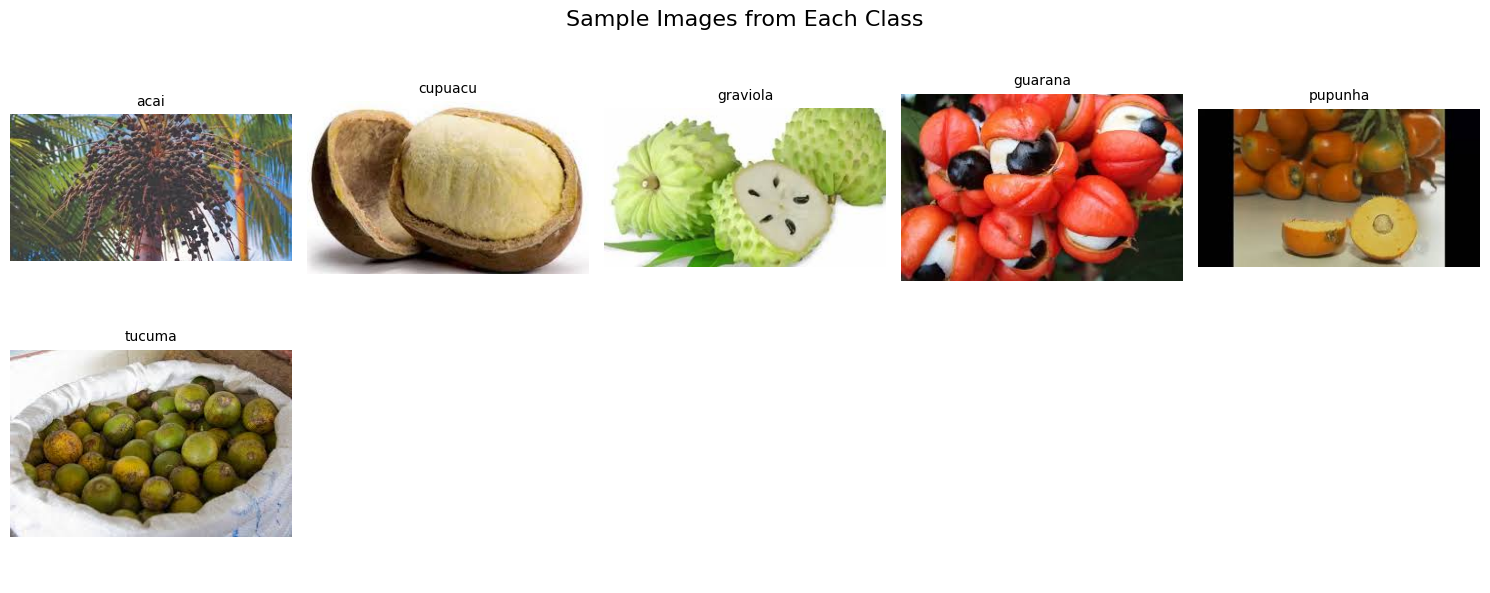

In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a different class, confirming correct dataset structure.
Images vary in resolution, lighting, and orientation.
Some classes may have fewer images, indicating dataset imbalance.
Preprocessing (resizing, normalization) may be needed for consistency.

In [4]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [10]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Pralhad_Gurung.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.1042 - loss: 1.8544
Epoch 1: val_loss improved from inf to 1.86793, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 701ms/step - accuracy: 0.1094 - loss: 1.8654 - val_accuracy: 0.0556 - val_loss: 1.8679
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.2297 - loss: 1.6621
Epoch 2: val_loss improved from 1.86793 to 1.24354, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 888ms/step - accuracy: 0.2313 - loss: 1.6645 - val_accuracy: 0.7222 - val_loss: 1.2435
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.3692 - loss: 1.5086
Epoch 3: val_loss did not improve from 1.24354
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 531ms/step - accuracy: 0.3741 - loss: 1.5001 - val_accuracy: 0.0000e+00 - val_loss: 2.2503
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.3565 - loss: 1.4880
Epoch 4: val_loss improved from 1.24354 to 1.06036, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 497ms/step - accuracy: 0.3785 - loss: 1.4654 - val_accuracy: 0.7222 - val_loss: 1.0604
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.5127 - loss: 1.1623
Epoch 5: val_loss did not improve from 1.06036
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 528ms/step - accuracy: 0.5269 - loss: 1.1529 - val_accuracy: 0.6667 - val_loss: 1.2132
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.7639 - loss: 0.8831
Epoch 6: val_loss improved from 1.06036 to 0.95419, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 504ms/step - accuracy: 0.7708 - loss: 0.8769 - val_accuracy: 0.7222 - val_loss: 0.9542
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.7905 - loss: 0.5906
Epoch 7: val_loss did not improve from 0.95419
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 760ms/step - accuracy: 0.7873 - loss: 0.5923 - val_accuracy: 0.6111 - val_loss: 1.0944
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.9201 - loss: 0.4101
Epoch 8: val_loss did not improve from 0.95419
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 813ms/step - accuracy: 0.9193 - loss: 0.4130 - val_accuracy: 0.6111 - val_loss: 1.1296
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.7593 - loss: 0.5854
Epoch 9: val_loss improved from 0.95419 to 0.45540, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 503ms/step - accuracy: 0.7639 - loss: 0.5774 - val_accuracy: 0.8333 - val_loss: 0.4554
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.9797 - loss: 0.2242
Epoch 10: val_loss did not improve from 0.45540
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - accuracy: 0.9813 - loss: 0.2192 - val_accuracy: 0.8889 - val_loss: 0.4771
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 1.0000 - loss: 0.1219
Epoch 11: val_loss improved from 0.45540 to 0.34932, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 694ms/step - accuracy: 1.0000 - loss: 0.1202 - val_accuracy: 0.8889 - val_loss: 0.3493
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 1.0000 - loss: 0.0763
Epoch 12: val_loss improved from 0.34932 to 0.29039, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 733ms/step - accuracy: 1.0000 - loss: 0.0749 - val_accuracy: 0.8333 - val_loss: 0.2904
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 1.0000 - loss: 0.0428
Epoch 13: val_loss did not improve from 0.29039
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 816ms/step - accuracy: 1.0000 - loss: 0.0434 - val_accuracy: 0.8333 - val_loss: 0.3080
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 1.0000 - loss: 0.0280
Epoch 14: val_loss improved from 0.29039 to 0.24769, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 534ms/step - accuracy: 1.0000 - loss: 0.0280 - val_accuracy: 0.8333 - val_loss: 0.2477
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 1.0000 - loss: 0.0182
Epoch 15: val_loss improved from 0.24769 to 0.24287, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 602ms/step - accuracy: 1.0000 - loss: 0.0180 - val_accuracy: 0.8333 - val_loss: 0.2429
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 1.0000 - loss: 0.0123
Epoch 16: val_loss did not improve from 0.24287
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 470ms/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 0.8333 - val_loss: 0.2487
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 1.0000 - loss: 0.0086
Epoch 17: val_loss did not improve from 0.24287
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 900ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.8333 - val_loss: 0.2495
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 1.0000 - loss: 0.0053
Epoch 18: val_loss did not improve from 0.24287
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 691ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.8333 - val_loss: 0.2583
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 1.0000 - loss: 0.0041
Epoch 19: val_loss did not improve from 0.24287
3/3 

In [14]:
test_dir = '/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.6333 - loss: 142.1624
Test Loss: 142.1624298095703
Test Accuracy: 0.6333333253860474


In [18]:

model.save('Pralhad_Gurung_Model.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.42      1.00      0.59         5
           2       1.00      0.80      0.89         5
           3       0.75      0.60      0.67         5
           4       1.00      0.60      0.75         5
           5       1.00      0.40      0.57         5

    accuracy                           0.67        30
   macro avg       0.79      0.67      0.68        30
weighted avg       0.79      0.67      0.68        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 698ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 1: val_loss did not improve from 0.19422
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 869ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9444 - val_loss: 0.2066
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 2: val_loss did not improve from 0.19422
3/3 ━━━━━━━━━━━━

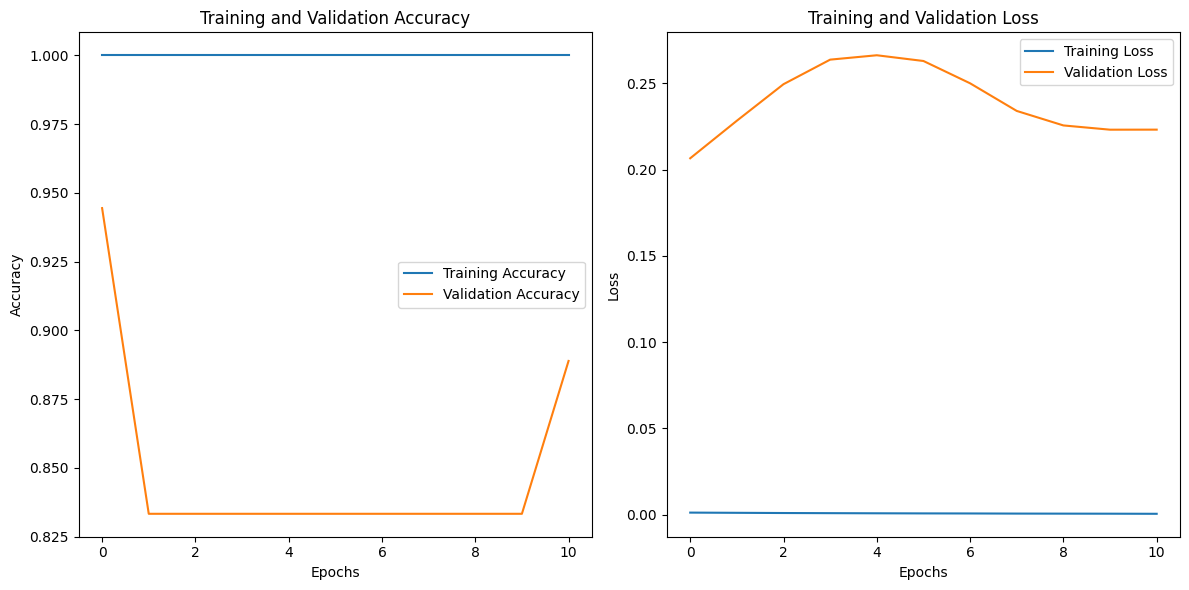

Model saved as 'Pralhad_Gurung_model.h5'


In [19]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('Pralhad_Gurung_Model.h5')
print("Model saved as 'Pralhad_Gurung_model.h5'")
